In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
from matplotlib.ticker import FuncFormatter
from pylab import rcParams
from matplotlib import animation
%matplotlib inline

In [55]:
data_df = pd.read_csv('trump_tweets.csv')
data_df.head(2)

,id,created_at,text,source,retweeted,link
0,7.963156e+17,2016-11-09 11:36:58,Such a beautiful and important evening! The fo...,Twitter for Android,False,NaN
1,7.963156e+17,2016-11-09 11:36:58,Such a beautiful and important evening! The fo...,Twitter for Android,False,NaN


In [56]:
source_df = data_df.ix[data_df['source'].str.contains('iPhone') | data_df['source'].str.contains('Android')]

In [57]:
source_df.groupby(by='source').size()

source
Twitter for Android    1013
Twitter for iPhone     1336
dtype: int64

In [59]:
Dat = pd.to_datetime(souce_df.created_at)
source_df['hour'] = Dat.dt.hour

### Tweet timings
Tweet time is very different for both- iPhone and Android tweets. WHile iPhone tweets are more frequent during early in the morning between 1-3, Android tweets are more common during the day between 11 to 14.

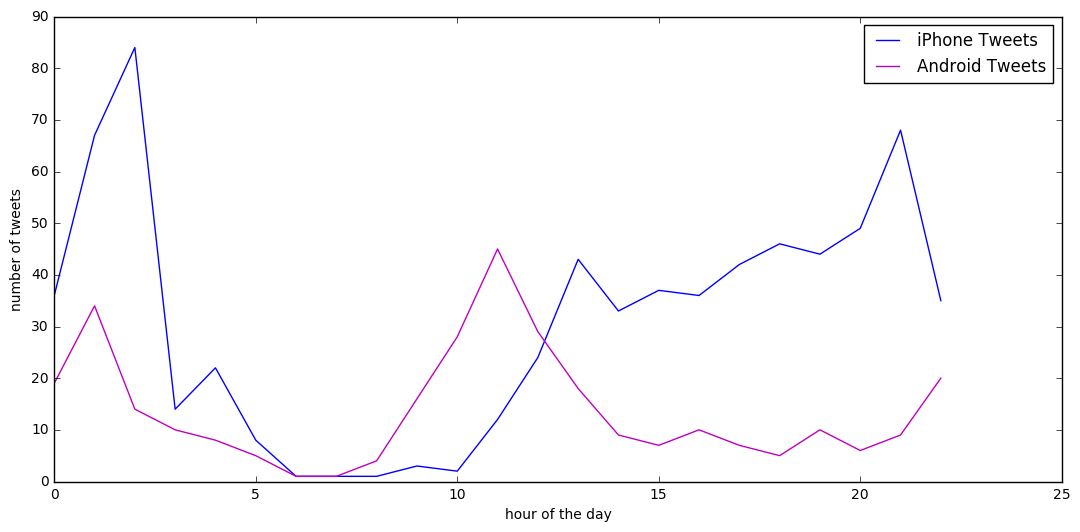

In [60]:
x = np.arange(23)
iPhone_tweet = np.array(souce_df.hour[souce_df.source.str.contains('iPhone')].value_counts(sort= False))
iphone_tweet_count = iPhone_tweet.shape[0]
plt.plot(x, iPhone_tweet, 'b', label='iPhone Tweets')
android_tweet = np.array(souce_df.hour[souce_df.source.str.contains('Android')].value_counts(sort= False))
android_tweet_count = android_tweet.shape[0]
plt.plot(x, android_tweet, 'm', label='Android Tweets')
plt.ylabel('number of tweets')
plt.xlabel('hour of the day')
plt.legend()
plt.show()

### Use of quotes
Tweets from Andoid are more likely to have quotes than otherwise.

In [62]:
quotation_df = source_df[souce_df.text.str.startswith('"')]

In [64]:
quotation_df.groupby(by='source').size()

source
Twitter for Android    89
Twitter for iPhone     10
dtype: int64

In [76]:
non_quotation_df = source_df[~source_df['text'].str.startswith('"')]

In [78]:
non_quotation_df.groupby(by='source').size()

source
Twitter for Android     729
Twitter for iPhone     1317
dtype: int64

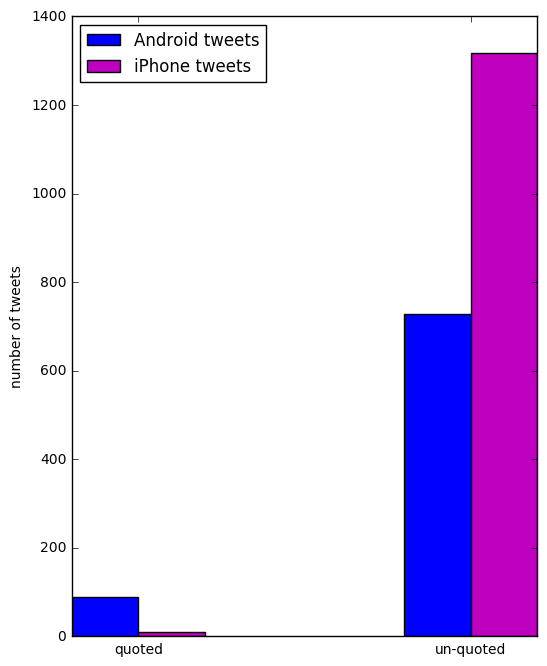

In [320]:
fig = plt.gcf()
fig.set_size_inches(6, 8)
x = [1, 2]
x = np.array(x)
x_ticks = ['quoted', 'un-quoted']
y1 = [89, 729]
y2 = [10, 1317]
w = .2
plt.ylabel('number of tweets')
plt.xticks(x-(w/2), x_ticks)
ax = plt.subplot(111)
ax.bar(x-w, y1,width=w,color='b',align='center', label='Android tweets')
ax.bar(x, y2,width=w,color='m',align='center', label='iPhone tweets')
plt.legend(loc=0)
plt.show()

### Use of Attachment
Tweets from iPhone are more likely to have pics, links etc.

In [87]:
attacment_df = source_df.copy()
attacment_df.loc[attacment_df['text'].str.contains('t.co'), 'attachment'] = True
attacment_df.loc[attacment_df['attachment'].isnull(), 'attachment'] = False
attacment_df.loc[attacment_df['text'].str.contains('t.co'), 'attachment'] = True
attacment_df.head(2)

,id,created_at,text,source,retweeted,link,attachment
0,7.963156e+17,2016-11-09 11:36:58,Such a beautiful and important evening! The fo...,Twitter for Android,False,NaN,False
1,7.963156e+17,2016-11-09 11:36:58,Such a beautiful and important evening! The fo...,Twitter for Android,False,NaN,False


In [89]:
attacment_df.groupby(by=['source', 'attachment']).size()

source               attachment
Twitter for Android  False          929
                     True            84
Twitter for iPhone   False          329
                     True          1007
dtype: int64

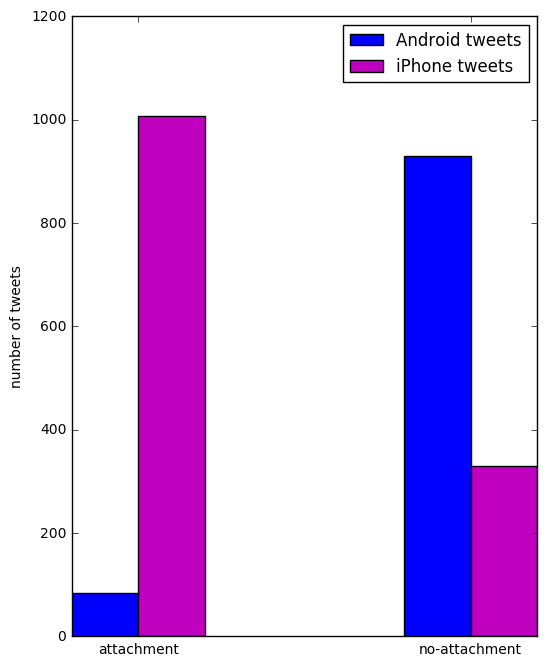

In [321]:
fig = plt.gcf()
fig.set_size_inches(6, 8)
x = [1, 2]
x = np.array(x)
x_ticks = ['attachment', 'no-attachment']
y1 = [84, 929]
y2 = [1007, 329]
w = .2
plt.ylabel('number of tweets')
plt.xticks(x-(w/2), x_ticks)
ax = plt.subplot(111)
ax.bar(x-w, y1,width=w,color='b',align='center', label='Android tweets')
ax.bar(x, y2,width=w,color='m',align='center', label='iPhone tweets')
plt.legend(loc=0)
plt.show()

### Content analysis
Analysing the most common words in both- iPhone and Android tweets. Though these words do not tell us the sentiment- anger, fear, joy etc, we can see that they are still vey different in terms of usage. For xaple tweets from Android use 'crooked' and 'dishonet' more.

In [112]:
import nltk
import string
from collections import Counter
from nltk.corpus import stopwords

In [341]:
remove = [':', '!', '#', 'https', '.', '-', '@', '&', 'is', 'we', 'are', 'at', '+https', '+', '``', ',', ';', 
          '?', '(', ')', '\'s', '""', '\'\'', 'n\'t', '$', 'would', 'rt', '%', '…', '--', '...', 'amp', 'new', 'get', 
          'said']
stop_words = stopwords.words('english')
stop_words.extend(remove)

def get_tokens(text):
    lowers = text.lower()
    no_punctuation = lowers.translate(string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    tokens = [w for w in tokens if not w in stop_words]
    return tokens

In [342]:
iphone_df = source_df[source_df.source.str.contains('iPhone')]
iphone_texts = iphone_df.text.str.cat(sep=' ') 

In [343]:
android_df = source_df[source_df.source.str.contains('Android')]
android_texts = android_df.text.str.cat(sep=' ')

In [346]:
tokens = get_tokens(iphone_texts)
count = Counter(tokens)
print (count.most_common(10))

[('thank', 335), ('great', 151), ('join', 141), ('hillary', 132), ('clinton', 126), ('makeamericagreatagain', 112), ('trump2016', 109), ('america', 95), ('make', 78), ('americafirst', 65)]


In [347]:
tokens = get_tokens(android_texts)
count = Counter(tokens)
print (count.most_common(10))

[('hillary', 238), ('realdonaldtrump', 182), ('great', 179), ('crooked', 169), ('trump', 125), ('clinton', 115), ('people', 94), ('media', 66), ('bad', 66), ('thank', 65)]


### Document Analysis using IBM Tone Analyzer

In [357]:
from IPython.display import Image


Below is the analysis for oldest 100 Android tweets.

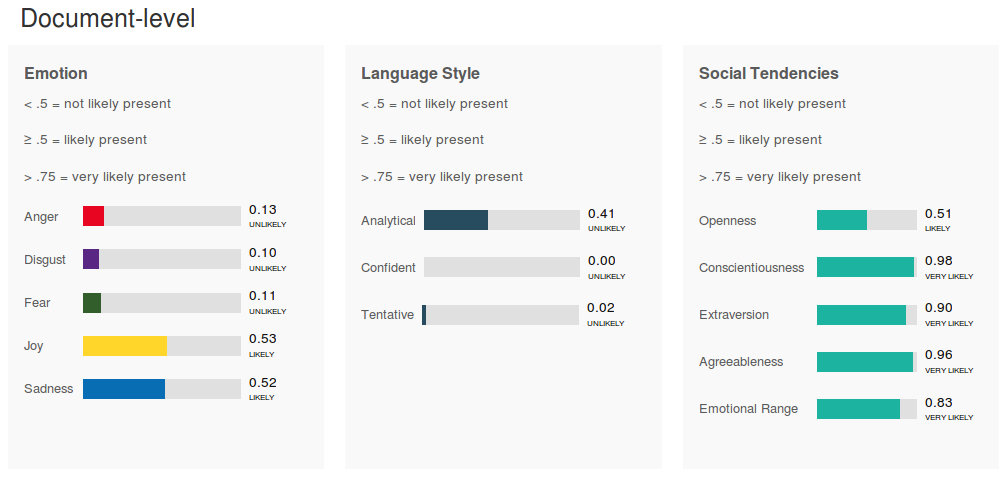

In [358]:
Image(filename='android_sentiments.png')

Below is the analysis for oldest 100 iPhone tweets.

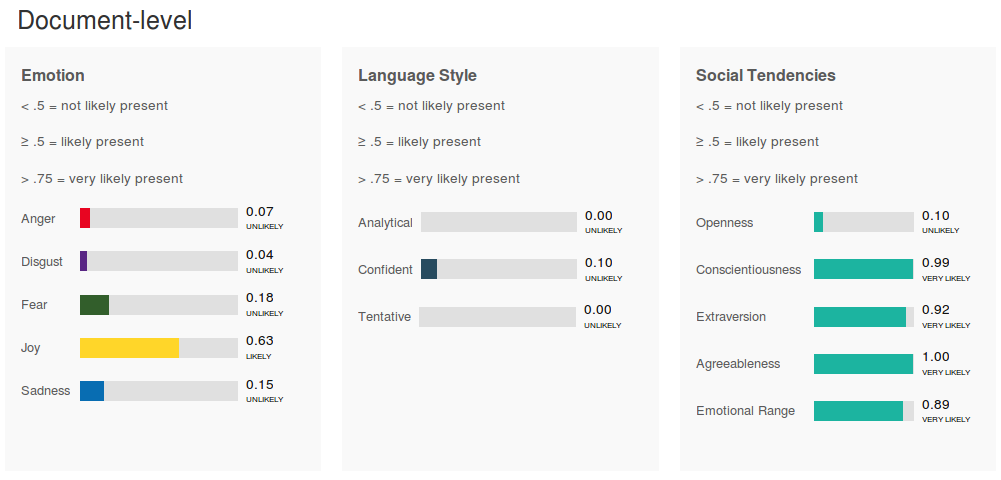

In [359]:
Image(filename='iPhone_sentiments.png')

As per our anaysis we can see that there are marked differences between tweets frm both the sources. It has been claimed that Android tweets are from Donald Trumo while iPhone tweets are from his staff.